In [19]:
import numpy as np

In [22]:
class SVM:
    def __init__(self, lr=0.001, n_iter=1000, y_lambda=0.01):
        self.lr = lr
        self.n_iter = n_iter
        self.y_lambda = y_lambda
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        y_ = np.where(y > 0, 1, -1)
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iter):
            for index, xi in enumerate(X):
                condition = y_[index] * (np.dot(xi, self.weight) - self.bias) >= 1
                if condition:
                    self.weight -= self.lr * (2 * self.y_lambda * self.weight)
                    self.bias = 0
                else:
                    self.weight -= self.lr * (
                        2 * self.y_lambda * self.weight - np.dot(xi, y_[index])
                    )
                    self.bias -= self.lr * y_[index]

    def predict(self, X):
        linear = np.dot(self.weight, X) - self.bias
        return np.sign(linear)

[0.61505381 0.16095805] 0


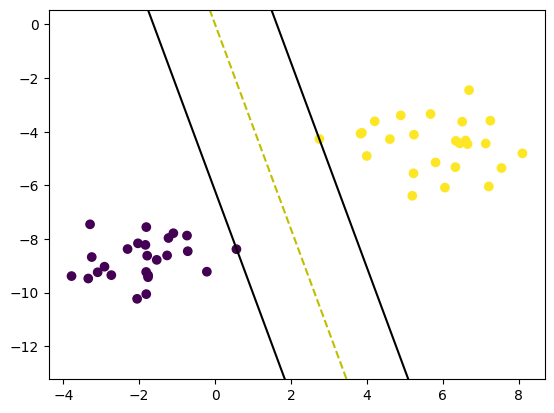

In [23]:
if __name__ == "__main__":
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)

    print(clf.weight, clf.bias)

    def visualize_svm():
        def get_hyperplane_value(x, weight, bias, offset):
            return (-weight[0] * x + bias + offset) / weight[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.weight, clf.bias, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.weight, clf.bias, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.weight, clf.bias, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.weight, clf.bias, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.weight, clf.bias, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.weight, clf.bias, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()
